In [1]:
class Nick_NN():
    
    
###################################Initisilisng Parameters #################################################################################    
    
    def __init__(self,**kwargs):
        
        ###### Default Parameters#######
        self.Hidden_node_size=5
        self.Output_node_size=1
        self.Hidden_layers=2
        self.iterations=10000
        self.alpha=0.5
        self.alpha_const=0.001    
        self.momentum=0.9
        
        self.Z=-9999
        
        #######Overide Parameters#########
        
        self.args = ['Hidden_node_size', 'Output_node_size','Hidden_layers','iterations','alpha','alpha_const','momentum']
        
        for a in self.args:
            if a in kwargs:
                exec('self.'+a+' = kwargs[a]')
                
                
        ################################################################

        
        #######Initiliasing further parameters#######
        self.Input_layer_size=X.shape[1]       
        self.weights=[]
        self.constants=[] 
        
        #######Initiliasing History ################
        self.cost_history=np.zeros((self.iterations,self.Hidden_layers+1,1)) 
        self.Output_history=np.zeros((self.iterations,X.shape[0],1))
        
     

     
    
###################################Functions of Neural Net #################################################################################    

    ###############################Fitting the Neural Net ##########################################################    

    def Fit_NN(self,X,Y):
         
                ###########Setting up neccessary lists and arrays to Fit NN###############
        
        Layers=[0]*(self.Hidden_layers+2)
        Error=[0]*(self.Hidden_layers+1)
        D_error=[0]*(self.Hidden_layers+1)
        Slope=[0]*(self.Hidden_layers+1)
        costs=np.zeros(self.Hidden_layers+1)
        
        
                ##################Setting up weights and constants from input to 1st hidden layer############
        weight=np.random.uniform(-2,2,size=(self.Input_layer_size,self.Hidden_node_size))
        self.weights.append(weight) 
        
        constant=np.zeros((1,self.Hidden_node_size))
        self.constants.append(constant)
                
        change_constants=[]
        change_constant=np.zeros((1,self.Hidden_node_size))
        change_constants.append(change_constant) 
        
        
               
        change_weights=[]
        change_weight=np.zeros((self.Input_layer_size,self.Hidden_node_size))
        change_weights.append(change_weight)          
        
            ##################Setting up weights and constants from 1st to nth hidden layer##############
        if self.Hidden_layers>1:
            for n in range(self.Hidden_layers-1):
                n=n+1
                weight=np.random.uniform(-2,2,size=(self.Hidden_node_size,self.Hidden_node_size))
                self.weights.append(weight) 
                constant=np.zeros((1,self.Hidden_node_size))
                self.constants.append(constant)
                change_constant=np.zeros((1,self.Hidden_node_size))
                change_constants.append(change_constant) 
                change_weight=np.zeros((self.Hidden_node_size,self.Hidden_node_size))
                change_weights.append(change_weight) 


            ################Setting up weights and constants from nth to outer  layer##############
    
        weight=np.random.uniform(-2,2,size=(self.Hidden_node_size,self.Output_node_size))
        self.weights.append(weight)
        constant=np.zeros((1,self.Output_node_size))
        self.constants.append(constant)
        change_constant=np.zeros((1,self.Output_node_size))
        change_constants.append(change_constant) 
        change_weight=np.zeros((self.Hidden_node_size,self.Output_node_size))
        change_weights.append(change_weight) 


            ###############Start forward and Back Propogation for each iteration###########   
        i=0
        Layers[0]=X
        Constant_history=[]
        Weight_history=[]


        while i<self.iterations:

            Constant_history.append(self.constants.copy())
            Weight_history.append(self.weights.copy())
            
            
                #############Forward propagation####################   
            for l in range(self.Hidden_layers+1):
                FPN=Nick_NN.__For_Prop_Node(Layers[l],self.weights[l],self.constants[l])
                Act=Nick_NN.__Act_func(FPN)
                Layers[l+1]=Act     


                ###############Backward propagation##################   
            Error[self.Hidden_layers]=Layers[self.Hidden_layers+1]-Y
            Slope[self.Hidden_layers]=Nick_NN.__Der_Act_func(Layers[self.Hidden_layers+1])
            D_error[self.Hidden_layers]=Error[self.Hidden_layers]*Slope[self.Hidden_layers]
            costs[self.Hidden_layers]=Nick_NN.__cost_function(Layers[self.Hidden_layers],Y,self.weights[self.Hidden_layers],self.constants[self.Hidden_layers])
            for l in range(self.Hidden_layers):
                z=(self.Hidden_layers-1)-l        
                Error[z]=D_error[z+1].dot(self.weights[z+1].T) 
                Slope[z]=Nick_NN.__Der_Act_func(Layers[z+1])
                D_error[z]=Error[z]*Slope[z]
                Layer_adj=Layers[z+1]+Error[z]
                costs[z]=Nick_NN.__cost_function(Layers[z],Layer_adj,self.weights[z],self.constants[z])
            for l in range(self.Hidden_layers+1):
                z=self.Hidden_layers-l
                self.weights[z],change_weights[z]=Nick_NN.__Back_Prop_Node(D_error[z],Y,Layers[z],self.weights[z],self.alpha,self.momentum,change_weights[z])  
                change_constants[z]=np.sum(D_error[z],axis=0)*self.alpha_const+change_constants[z]*self.momentum
                self.constants[z]=self.constants[z]-change_constants[z]
                
            
            self.Output_history[i]=Layers[self.Hidden_layers+1]

            for l in range(self.Hidden_layers+1):   
                self.cost_history[i][l]=costs[l]   
            i=i+1
            
        return self.Output_history[-1:][0]
    
    
     ###############################Prediction ########################################################## 
    
    def Score(self,Xt):
        Layers_test=[0]*(self.Hidden_layers+2)
        Layers_test[0]=Xt
        for l in range(self.Hidden_layers+1):
            FPN=Nick_NN.__For_Prop_Node(Layers_test[l],self.weights[l],self.constants[l])
            Act=Nick_NN.__Act_func(FPN)
            Layers_test[l+1]=Act 
    
        Output_test=Layers_test[self.Hidden_layers+1]    
        return Output_test
    
    
    ############################### ROC Curve ########################################################## 

    def ROC(self,Actual,Output):
        join=np.column_stack([Output,Actual])
        join=join[join[:,0].argsort()][::-1]
        Y_ax=0
        X_ax=0
        ROC_Data=np.array([[0,0]])
        for x in join:
            if x[1]==1:
                Y_ax=Y_ax+1
            if x[1]==0:
                X_ax=X_ax+1
            new_roc=np.array([[Y_ax,X_ax]])
            ROC_Data=np.concatenate((ROC_Data,new_roc),axis=0)  
        ROC_Data=ROC_Data/[ROC_Data[-1][0],ROC_Data[-1][1]]
        Z=[0,1]
        plt.clf()
        plt.plot(ROC_Data[:,1],ROC_Data[:,0])
        plt.plot(Z)
        plt.show() 

###############################################Get Functions ###################################################################    
    
    
    
    def Get_Parameters(self):  
        for a in self.args:
            exec('self.Z; self.Z=self.'+a)
            print(a+': '+str(self.Z))
        

    def Get_Weights(self):
        return self.weights
    
    def Get_Constants(self):
        return self.constants
    
    def Get_Cost_History(self):
        return self.cost_history
    
    def Get_Output_History(self):
        return self.Output_history
       
    
###############################################Inner Functions ###################################################################    



    ######forward Propogation##############

    def __For_Prop_Node(X,weights,constant):
        output=np.dot(X,weights)+constant
        return output

    ######Backward Propogation##############

    def __Back_Prop_Node(Error,Y,X,theta,alpha,m,change_theta):
        gradiant=X.T.dot(Error)/len(Y)
        change_theta=gradiant*alpha+ m*change_theta
        theta= theta-change_theta
        return theta,change_theta


    ######Cost Function##############

    def __cost_function(X, Y, theta, constant):
        Expected=X.dot(theta)+constant
        Expected=Nick_NN.__Act_func(Expected)
        J = np.sum((Expected-Y)**2)/2/len(Y)    
        return J

    ######Activation Function##############


    def __Act_func(x):
        #return x 
        return 1/(1+np.exp(-x))
    
    ######Derivative of Activation Function##############
    
    def __Der_Act_func(x):
        return Nick_NN.__Act_func(x)*(1-Nick_NN.__Act_func(x))

    
    
   
   

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)

In [3]:
def conv(lists):
    output = []
    for a in lists:
        number = ord(a) - 96
        output.append(number)
    return output

In [4]:
data=pd.read_csv('mushrooms.csv')
for z in data:
    lists=[]
    lists=conv(data[z])
    data[z]=lists
data=data.drop('veil-type', axis =1)

In [5]:
lists=[]
for x in data['class']:
    if x==5:
        lists.append(0)
    else:
        lists.append(1)
data['class']=lists

In [6]:
Xdata=data.drop('class', axis =1)

In [7]:
Xtraindata, Xtestdata, Ytraindata, Ytestdata = sk.model_selection.train_test_split(Xdata,data[['class']], test_size=0.2,random_state=123, stratify=data['class'])

In [8]:
X_train_scales= sk.preprocessing.normalize(Xtraindata)
X_test_scales= sk.preprocessing.normalize(Xtestdata)

In [9]:
X=np.array(X_train_scales)
Y=np.array(Ytraindata)

In [10]:
Xt=np.array(Xtestdata)
Yt=np.array(Ytestdata)

In [11]:
test2=Nick_NN()

In [12]:
test2.Get_Parameters()

Hidden_node_size: 5
Output_node_size: 1
Hidden_layers: 2
iterations: 10000
alpha: 0.5
alpha_const: 0.001
momentum: 0.9


In [13]:
out=test2.Fit_NN(X,Y)

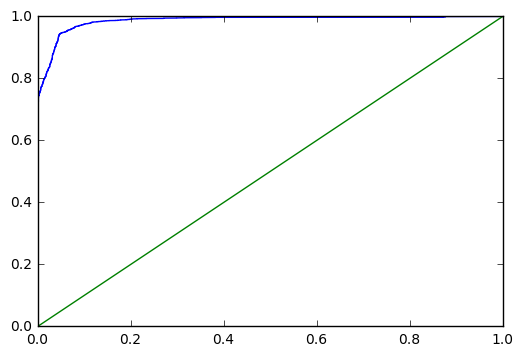

In [14]:
test2.ROC(Y,out)

In [15]:
out2=test2.Score(Xt)

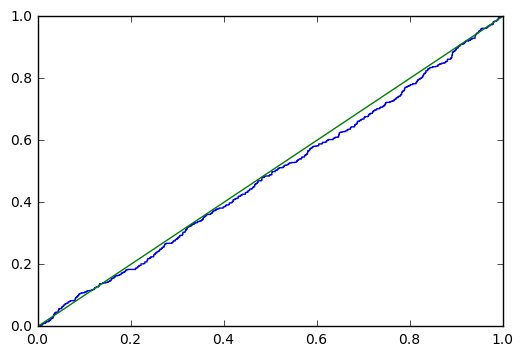

In [17]:
test2.ROC(Yt,out2)
